Dataset Shape: (1436, 11)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   3

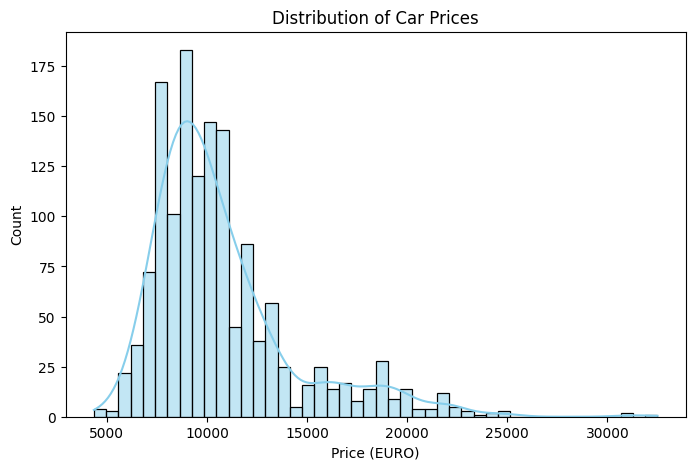

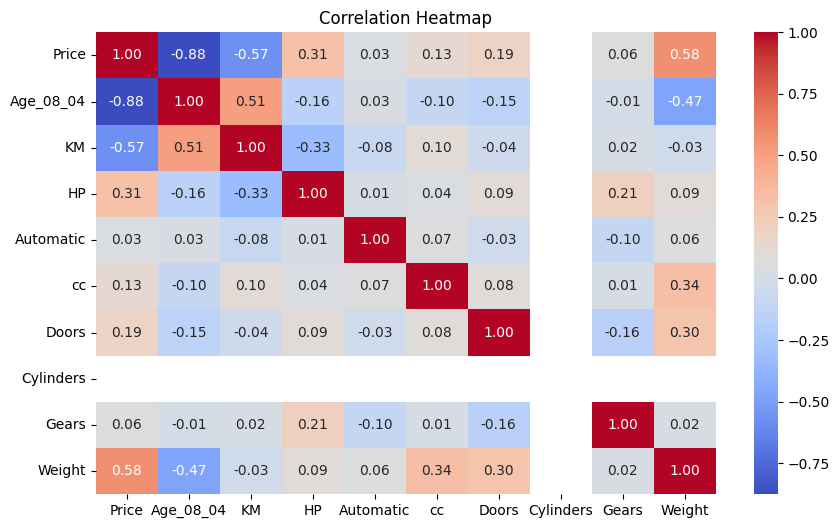

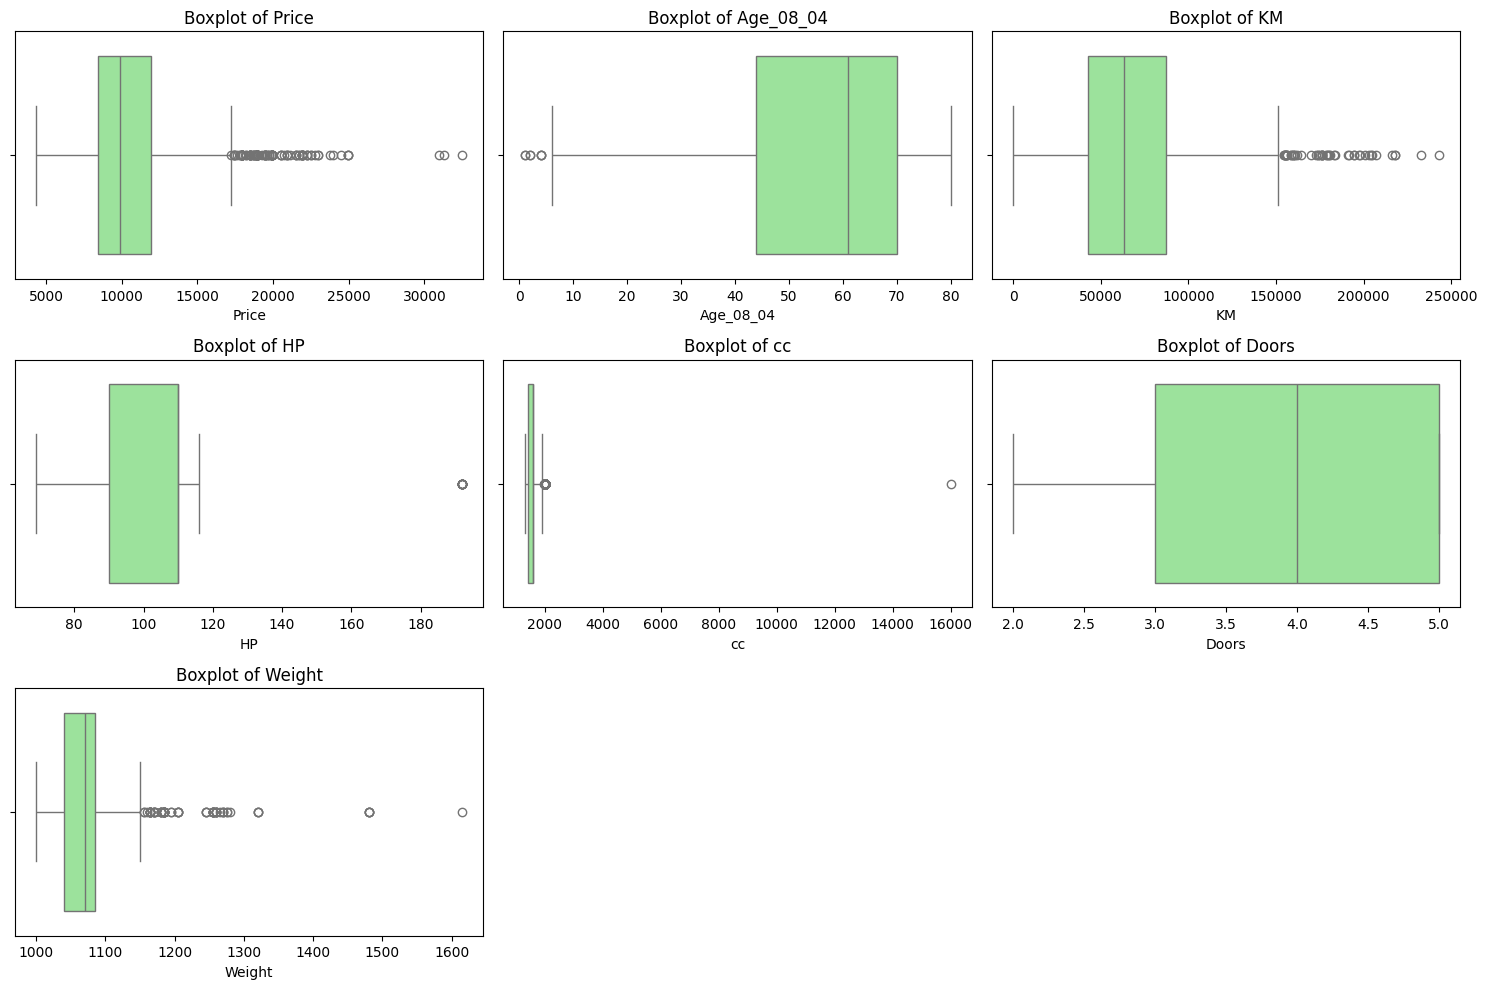


Processed Data Preview:
   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              True             False  


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")  # Make sure the file is uploaded

# Step 3: Basic information
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 5: Check unique values in categorical column
print("\nUnique values in Fuel_Type:")
print(df['Fuel_Type'].value_counts())

# Step 6: Visualize target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price (EURO)")
plt.show()

# Step 7: Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 8: Boxplots for outliers
num_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 9: Convert categorical variable to dummy variables
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Step 10: Final look at processed data
print("\nProcessed Data Preview:")
print(df_encoded.head())


In [ ]:
# 1. Import Required Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load and Preprocess the Dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# 3. Define Features and Target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# 4. Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model 1: All Features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# 6. Model 2: Drop 'Doors'
X_train_m2 = X_train.drop('Doors', axis=1)
X_test_m2 = X_test.drop('Doors', axis=1)
model2 = LinearRegression()
model2.fit(X_train_m2, y_train)
y_pred2 = model2.predict(X_test_m2)

# 7. Model 3: Top 5 Correlated Features
top_features = ['Weight', 'Age_08_04', 'KM', 'HP', 'cc']
model3 = LinearRegression()
model3.fit(X_train[top_features], y_train)
y_pred3 = model3.predict(X_test[top_features])

# 8. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name}")
    print("R² Score:", round(r2_score(y_true, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))

# 9. Evaluate All Models
evaluate_model(y_test, y_pred1, "Model 1: All Features")
evaluate_model(y_test, y_pred2, "Model 2: Without 'Doors'")
evaluate_model(y_test, y_pred3, "Model 3: Top 5 Features")

# 10. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression (α=1.0)")

# 11. Lasso Regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression (α=0.5)")



📊 Model 1: All Features
R² Score: 0.8349
RMSE: 1484.27

📊 Model 2: Without 'Doors'
R² Score: 0.8361
RMSE: 1478.9

📊 Model 3: Top 5 Features
R² Score: 0.8504
RMSE: 1412.79

📊 Ridge Regression (α=1.0)
R² Score: 0.8351
RMSE: 1483.15

📊 Lasso Regression (α=0.5)
R² Score: 0.8352
RMSE: 1482.97


1Normalization is the process of scaling data to a fixed range, typically between 0 and 1, and it is useful when the data does not follow a normal distribution or when features have different units or scales. Standardization, on the other hand, transforms the data to have a mean of zero and a standard deviation of one, which is particularly useful when the data approximately follows a Gaussian distribution. Both techniques help ensure that no single feature dominates the learning process due to scale differences, especially in algorithms like Multiple Linear Regression, Ridge, and Lasso. They also improve model performance and convergence speed during training.





2.Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unreliable coefficient estimates in a regression model. To address this, we can remove or combine highly correlated variables, use regularization methods such as Ridge or Lasso regression, or apply dimensionality reduction techniques like Principal Component Analysis (PCA). Additionally, calculating Variance Inflation Factor (VIF) helps identify variables contributing to multicollinearity. It is important to address multicollinearity because it violates one of the key assumptions of Multiple Linear Regression, which requires that predictor variables are not highly correlated with each other, as this can lead to unstable and misleading results.






Assumptions of Multiple Linear Regression (MLR)
Linearity:
There should be a linear relationship between the independent variables and the dependent variable. If this assumption is violated, the model may not capture the actual trend and will provide inaccurate predictions.



Independence of errors (no autocorrelation):
The residuals (errors) of the model should be independent of each other. If they are correlated, it can indicate model misspecification and reduce the validity of the statistical tests.




Homoscedasticity:
The variance of the residuals should remain constant across all levels of the independent variables. If not, this is called heteroscedasticity and can lead to inefficient estimates and incorrect conclusions.



Normality of residuals:
The residuals should be approximately normally distributed. This is important for accurate hypothesis testing and constructing confidence intervals.




No multicollinearity:
The independent variables should not be highly correlated with each other. High multicollinearity can lead to unstable coefficient estimates and difficulties in interpreting the model.